# Imports

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.special as sp
%matplotlib inline

# Info

This notebook is for analysis of clients with the highest amount of transactions.

There are their ids:

id: 70780820, transactions: 88781 

id: 45479973, transactions: 34229

id: 90796706, transactions: 26856

id: 6736634, transactions: 25944

id: 60151282, transactions: 21111

# Data load

In [4]:
def primaryClientAnalysis(client):
    client = client.drop(client.axes[1][0], 1)
    client.head()
    client_mcc = {}
    mcc_codes = np.unique(client['mcc_code'])
    for code in mcc_codes:
        client_mcc[code] = client[client['mcc_code'] == code]
    legend = []
    for code in mcc_codes:
        if(len(client_mcc[code]) > 100):
            print("For this client and this mcc_code %s the summary is %s, amount of transactions is %s" % (code, sum(client_mcc[code]['amount']), len(client_mcc[code])))
            client_mcc[code]['amount'].plot(figsize=(15,10), legend=True)
            legend.append(code)
    plt.legend(legend)
    plt.show()
    return client_mcc

## Client 70780820

In [5]:
client1 = pd.read_csv('70780820.csv')

For this client and this mcc_code 4829 the summary is -343621092.67, amount of transactions is 159
For this client and this mcc_code 6010 the summary is 1244960563.24, amount of transactions is 88164
For this client and this mcc_code 6011 the summary is -905845208.25, amount of transactions is 308
For this client and this mcc_code 6012 the summary is 2668419.7, amount of transactions is 150


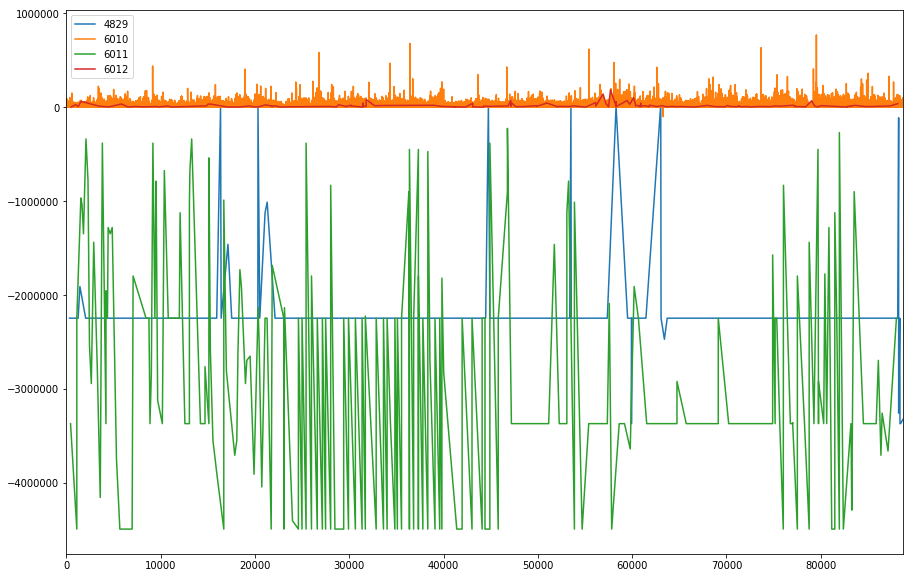

In [6]:
c1 = primaryClientAnalysis(client1)

## Client 45479973

For this client and this mcc_code 4829 the summary is -386463724.02, amount of transactions is 3427
For this client and this mcc_code 6010 the summary is 407366368.73, amount of transactions is 30566


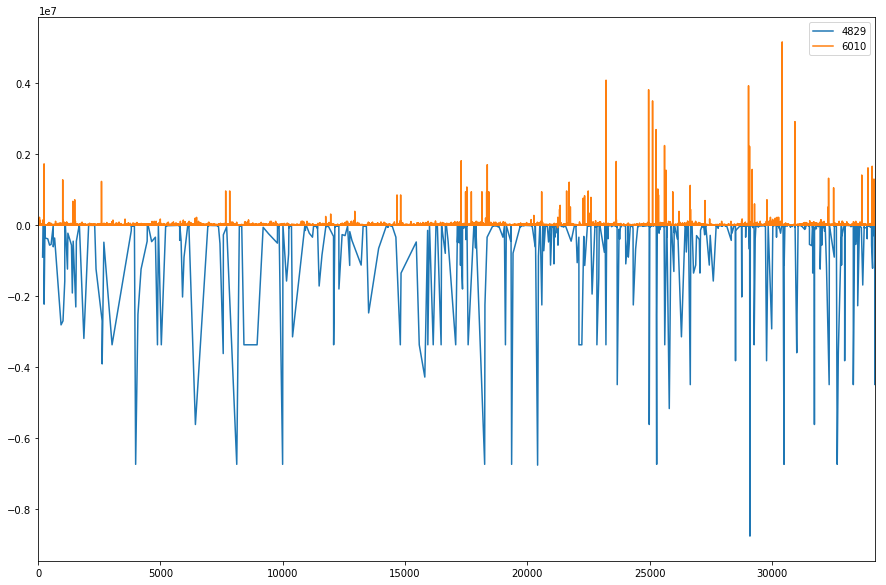

In [7]:
client2 = pd.read_csv('45479973.csv')
c2 = primaryClientAnalysis(client2)

## Client 90796706

For this client and this mcc_code 4829 the summary is -382301316.79, amount of transactions is 2685
For this client and this mcc_code 6010 the summary is 471013326.46, amount of transactions is 23955


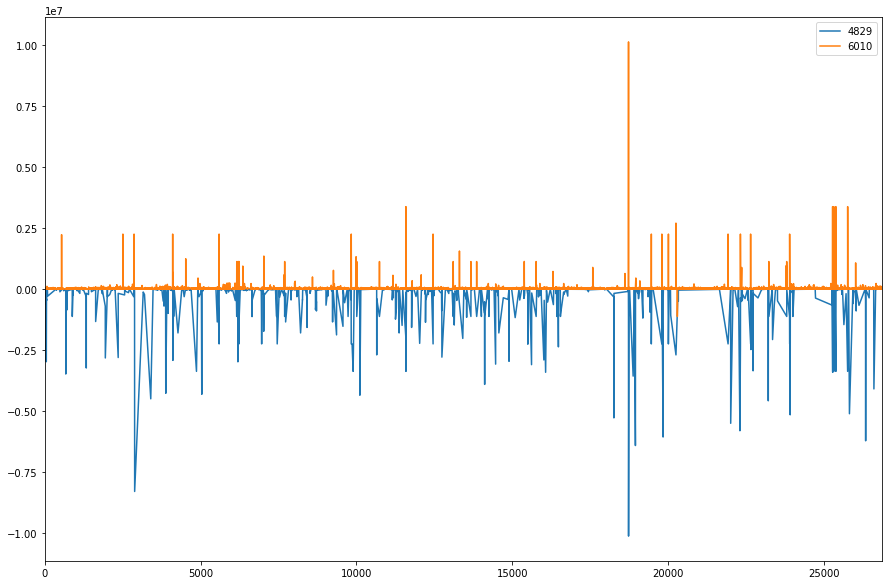

In [8]:
c3 = primaryClientAnalysis(pd.read_csv('90796706.csv'))

## Client 6736634

For this client and this mcc_code 4829 the summary is -733110286.61, amount of transactions is 1948
For this client and this mcc_code 6010 the summary is 999307629.28, amount of transactions is 22765
For this client and this mcc_code 6011 the summary is -233659461.76, amount of transactions is 552


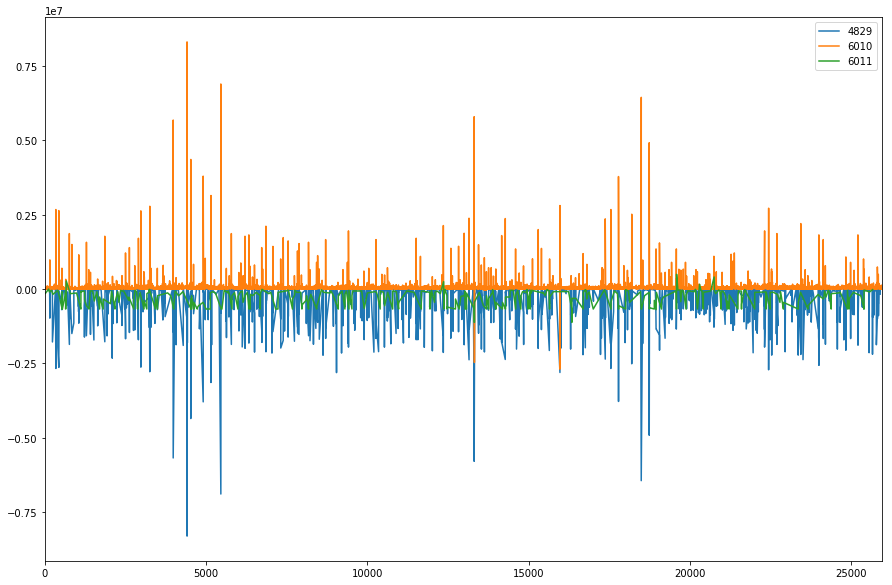

In [9]:
c4 = primaryClientAnalysis(pd.read_csv('6736634.csv'))

## Client 60151282

For this client and this mcc_code 4829 the summary is -245682735.83, amount of transactions is 1023
For this client and this mcc_code 5411 the summary is -2824813.58, amount of transactions is 123
For this client and this mcc_code 6010 the summary is 503775359.4, amount of transactions is 19332
For this client and this mcc_code 6011 the summary is -242563395.37, amount of transactions is 300


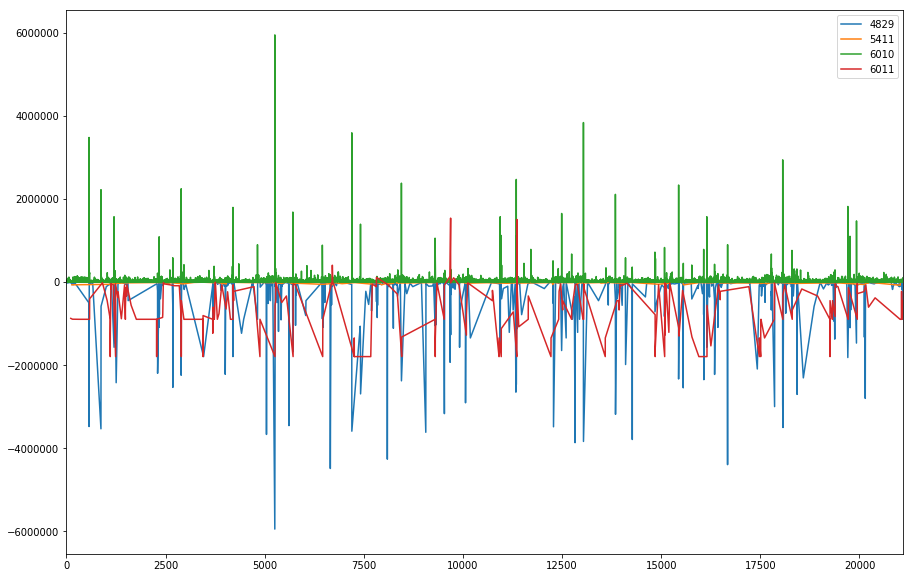

In [10]:
c5 = primaryClientAnalysis(pd.read_csv('60151282.csv'))

# Clients preprocess

Let's use only mcc_code=6010 for now

In [11]:
def mcc_process(client):
    return client[6010]

Let's count positive and negative values

In [12]:
def count_pos_and_neg(client):
    pos = 0
    neg = 0
    for value in client['amount']:
        if value > 0:
            pos = pos + 1
        if value < 0: 
            neg = neg + 1
    print('There are %s positive values and %s negative values.' % (pos, neg))

In [13]:
count_pos_and_neg(mcc_process(c1))
count_pos_and_neg(mcc_process(c2))
count_pos_and_neg(mcc_process(c3))
count_pos_and_neg(mcc_process(c4))
count_pos_and_neg(mcc_process(c5))

There are 88148 positive values and 16 negative values.
There are 30561 positive values and 5 negative values.
There are 23952 positive values and 3 negative values.
There are 22759 positive values and 6 negative values.
There are 19332 positive values and 0 negative values.


So we will use only positive values

In [14]:
def kick_negatives(client):
    return client[client['amount'] > 0]

Drop unused columns

In [15]:
def drop_unused_cols(client):
    return client.drop(['customer_id', 'tr_datetime', 'mcc_code', 'tr_type', 'term_id'], 1)

Sum values by days

In [16]:
def sum_by_days(client):
    result = {}
    days = pd.Series.unique(client['day'])
    for day in days:
        result[day] = sum(client[client['day'] == day]['amount'])
    return pd.DataFrame.from_dict(result, orient='index').rename(columns = {0 : 'amount'})

In [17]:
def all_one(client):
    return sum_by_days(drop_unused_cols(kick_negatives(mcc_process(client))))

In [18]:
daily_data1 = all_one(c1)
daily_data2 = all_one(c2)
daily_data3 = all_one(c3)
daily_data4 = all_one(c4)
daily_data5 = all_one(c5)

Let's build some plots

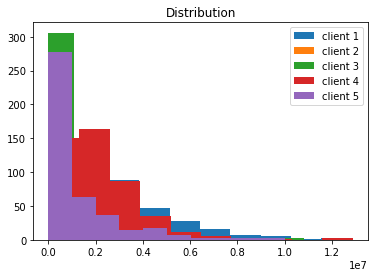

In [19]:
plt.hist(daily_data1['amount'])
plt.hist(daily_data2['amount'])
plt.hist(daily_data3['amount'])
plt.hist(daily_data4['amount'])
plt.hist(daily_data5['amount'])
plt.legend(['client 1','client 2','client 3','client 4','client 5'])
plt.title('Distribution')
plt.show()

# Exponential distribution

For exponential distribution lambda-parameter is expected value of sample

In [20]:
def get_lambda(X):
    return 1.0 / np.mean(X)

In [21]:
def count_lambda_probability(x, lambda_value):
    return 1.0 - np.exp(-lambda_value*x)

For each new value count lambda using previous values.
Then count probability, that new value is in distribution.

In [22]:
def naive_process(X):
    X_size = len(X)
    result = []
    for i in X.index.values:
        if i > 0:
            sub_samples = X['amount'].head(i - 1)
            new_value = X['amount'][i]
            result.append(count_lambda_probability(new_value, get_lambda(sub_samples)))
    return result

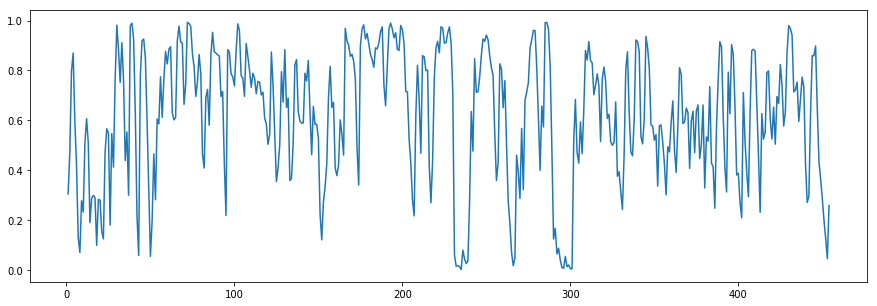

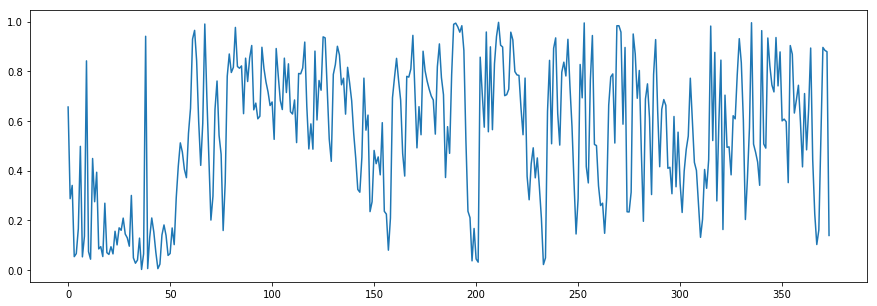

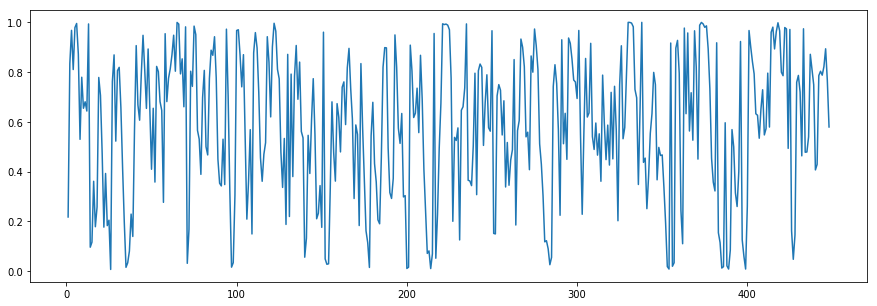

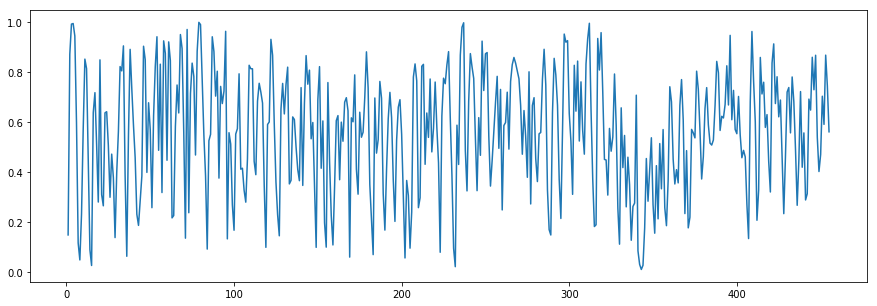

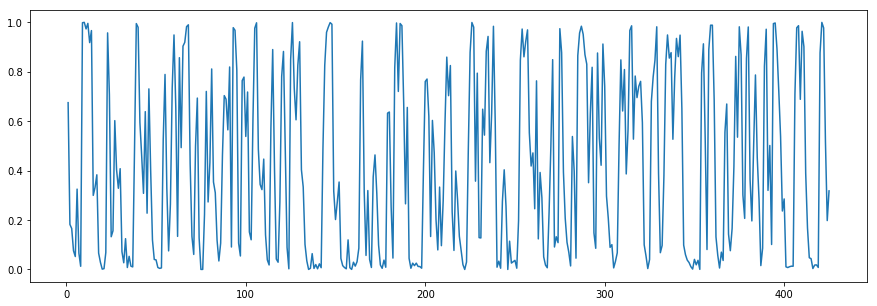

In [23]:
plt.figure(figsize=(15,5))
plt.plot(naive_process(daily_data1))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process(daily_data2))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process(daily_data3))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process(daily_data4))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process(daily_data5))
plt.show()

# Weekly partitions

Let's change our observation periods drom daily to weekly

In [24]:
def sum_by_weeks(client):
    result = {}
    days = client.index
    for week in range(1, int(len(days)/7)):
        result[week] = sum(client['amount'][week:week+7])
    return pd.DataFrame.from_dict(result, orient='index').rename(columns = {0 : 'amount'})

In [25]:
weekly_data1 = sum_by_weeks(daily_data1)
weekly_data2 = sum_by_weeks(daily_data2)
weekly_data3 = sum_by_weeks(daily_data3)
weekly_data4 = sum_by_weeks(daily_data4)
weekly_data5 = sum_by_weeks(daily_data5)

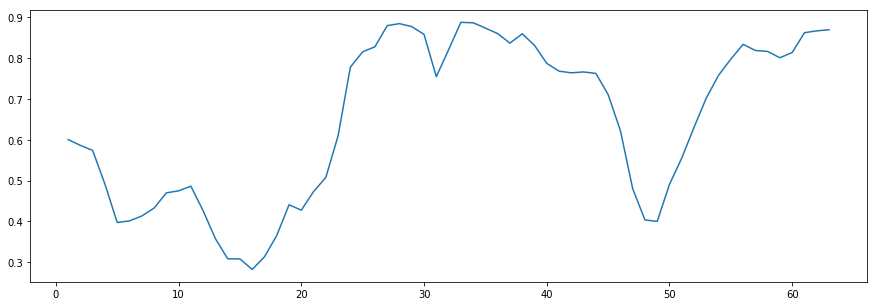

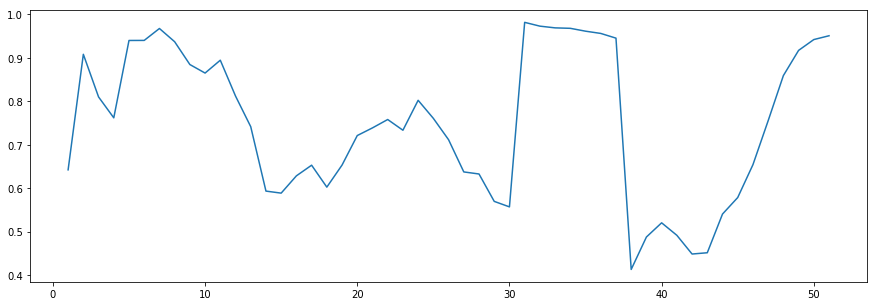

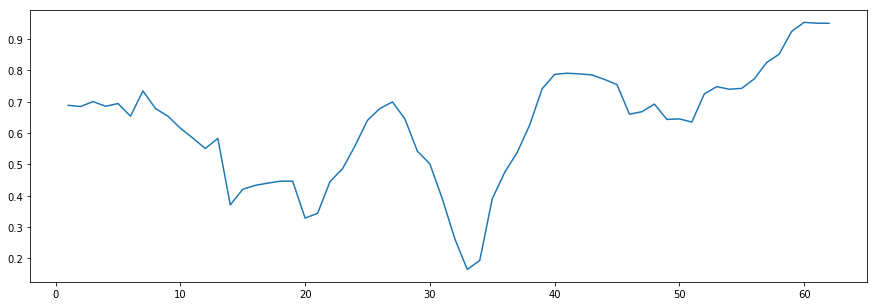

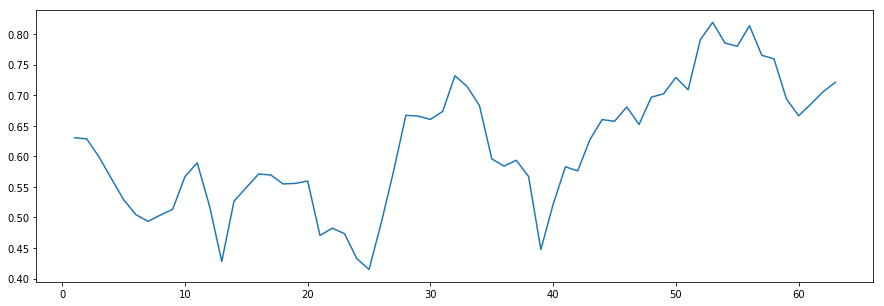

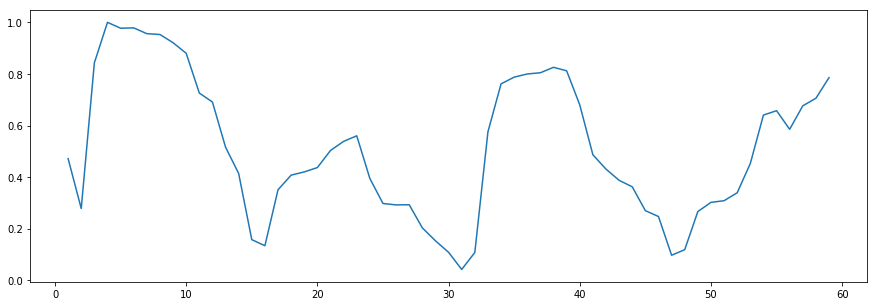

In [26]:
plt.figure(figsize=(15,5))
plt.plot(naive_process(weekly_data1))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process(weekly_data2))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process(weekly_data3))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process(weekly_data4))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process(weekly_data5))
plt.show()

# BOCA

In [63]:
#Bayessian Online Chngepoint algorithm based on constant hazard function and student probability density function
class BCOIAlgorithm:
    def __init__(self, data, lambda_value = 0.005, mu_value = 0, kappa_value = 1, alpha_value = 1, beta_value = 1):
        if not isinstance(data, list) and not isinstance(data, np.ndarray):
            raise ValueError('The Input data has to be a 1D data structure')
        if isinstance(data, np.ndarray) and data.ndim != 1:
            raise ValueError('The Input data has to be a 1D data structure')
        self.__data = data
        self.__lambda = 0.0005
        self.__initial_mu = mu_value
        self.__initial_kappa = kappa_value
        self.__initial_alpha = alpha_value
        self.__initial_beta = beta_value
        
    def predict(self):
        # Now we have some data in X and it's time to perform inference.
        # First, setup the matrix that will hold our beliefs about the current
        # run lengths.  We'll initialize it all to zero at first.  Obviously
        # we're assuming here that we know how long we're going to do the
        # inference.  You can imagine other data structures that don't make that
        # assumption (e.g. linked lists).  We're doing this because it's easy.
        R= np.zeros([len(self.__data)+1, len(self.__data)])
        
        # At time t=1, we actually have complete knowledge about the run
        # length.  It is definitely zero.  See the paper for other possible
        # boundary conditions.
        R[0,1] = 1
        
        # Keep track of the maximums.
        maxes  = np.zeros(len(self.__data)+1);

        # Track the current set of parameters.  These start out at the prior and
        # accumulate data as we proceed.

        muT    = np.array([self.__initial_mu])
        kappaT = np.array([self.__initial_kappa])
        alphaT = np.array([self.__initial_alpha])
        betaT  = np.array([self.__initial_beta])
        
        # Loop over the data like we're seeing it all for the first time.
        for t in range(1,len(self.__data) - 1):

            # Evaluate the predictive distribution for the new datum under each of
            # the parameters.  This is the standard thing from Bayesian inference.
            pred_probs = self.__probability_density_function(self.__data[t], muT, betaT*(kappaT+1)/(alphaT*kappaT), 2 * alphaT);

            # Evaluate the hazard function for this interval.
            H = self.__hazard_function(t);

            # Evaluate the growth probabilities - shift the probabilities down and to
            # the right, scaled by the hazard function and the predictive
            # probabilities.
            R[1:t+1,t+1] = R[0:t,t]* pred_probs * (1-H);

            # Evaluate the probability that there *was* a changepoint and we're
            # accumulating the mass back down at r = 0.
            R[0,t+1] = sum((R[0:t,t] * pred_probs * H).flatten() );

            # Renormalize the run length probabilities for improved numerical
            # stability.
            R[:,t+1] = R[:,t+1] / sum(R[:,t+1]);

            # Update the parameter sets for each possible run length.
            muT0    = np.vstack([self.__initial_mu, (kappaT*muT + self.__data[t]) / (kappaT+1)])
            kappaT0  = np.vstack([self.__initial_kappa, kappaT + 1])
            alphaT0  = np.vstack([self.__initial_alpha, alphaT + 0.5 ])
            betaT0   = np.vstack([self.__initial_beta, betaT + (kappaT *pow((self.__data[t]-muT),2))/(2*(kappaT+1)) ])

            muT = muT0
            kappaT = kappaT0
            alphaT = alphaT0
            betaT = betaT0

            # Store the maximum, to plot later.
            if(t-1 > 0):
                prev_step = maxes[t-1]
            else:
                prev_step = 0
            maxes[t] = self.__find_max_indicies(R[:,t], t, prev_step)
            
        return maxes
        
    def __hazard_function(self, t):
        return self.__lambda
    
    def __probability_density_function(self, x, mu, var, nu):
        # This form is taken from Kevin Murphy's lecture notes.
        c = np.exp(sp.gammaln(nu/2 + 0.5) - sp.gammaln(nu/2)) * pow((nu*np.pi*var), (-0.5))  
        return (c * pow((1 + (1/(nu*var))*pow((x-mu),2)), (-(nu+1)/2))).transpose()
    
    def __find_max_indicies(self, arr, step, prev_step):
        maximum = max(arr)
        indicies = []
        for i in range(len(arr) - 1, -1, -1):
            if arr[i] == maximum:
                indicies.append(i)
                #if(arr[int(prev_step + 1)] < maximum):
                    #print('Step: ' + repr(step) + " Delta: " + repr(maximum - arr[int(prev_step + 1)]))
                return i
    
    def foo(self):
        return self.__initial_mu

In [64]:
def BOCA_analysis(data):
    data.values.transpose()[0]
    
    algo = BCOIAlgorithm(data.values.transpose()[0])
    res = algo.predict()
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10), sharex=True)
    ax1.set_xlim(0, len(data))
    ax2.set_ylim(0, len(data))
    ax1.plot(range(0,len(data)), data)
    ax2.plot(range(0,len(data) + 1), res)

## Daily data

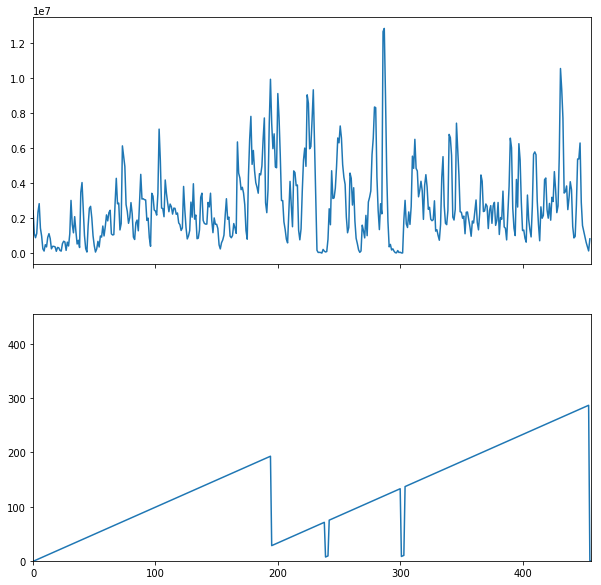

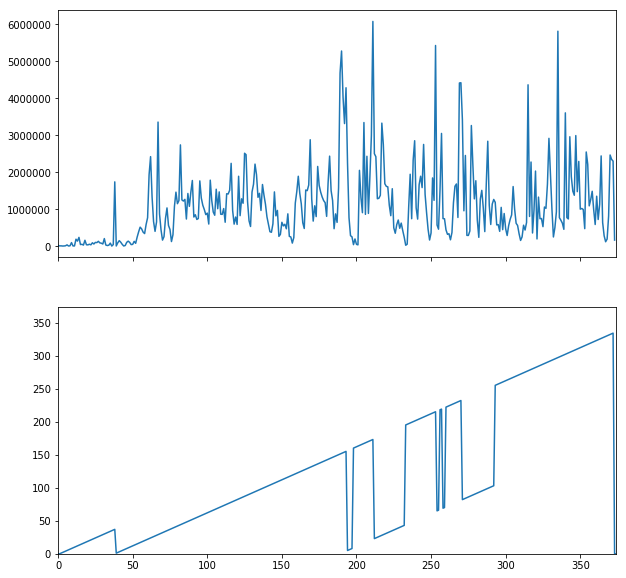

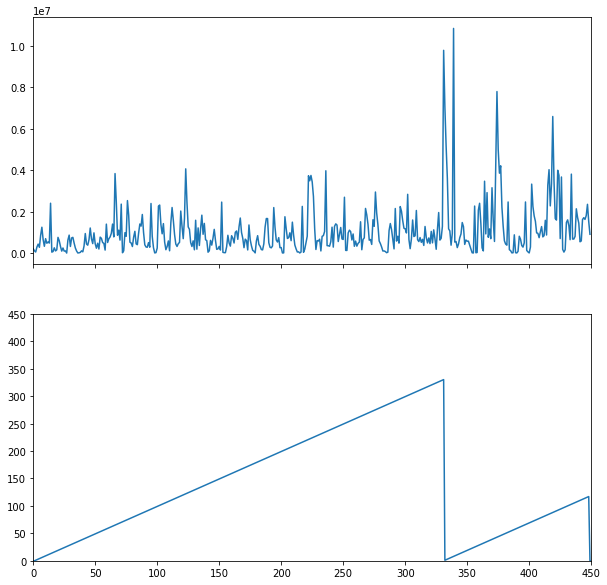

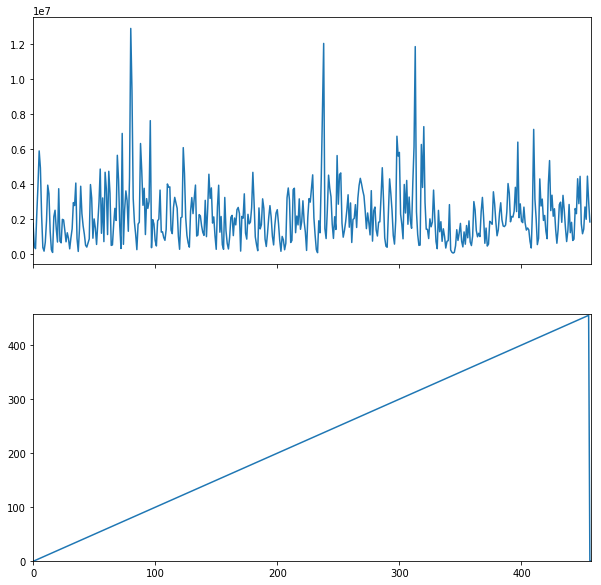

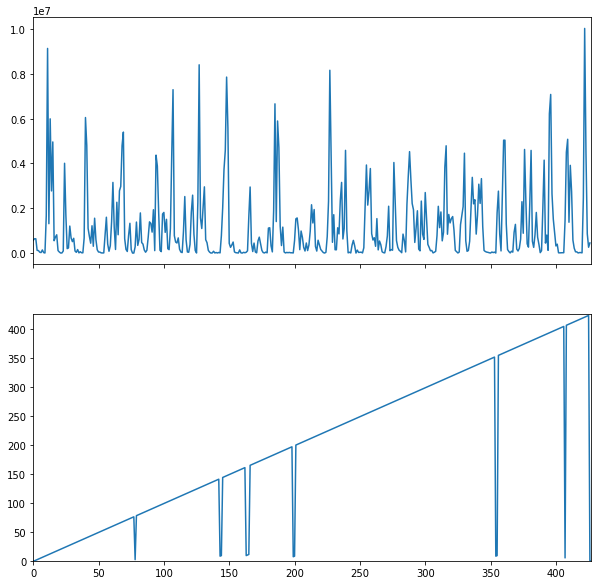

In [65]:
BOCA_analysis(daily_data1)
BOCA_analysis(daily_data2)
BOCA_analysis(daily_data3)
BOCA_analysis(daily_data4)
BOCA_analysis(daily_data5)

## Weekly data

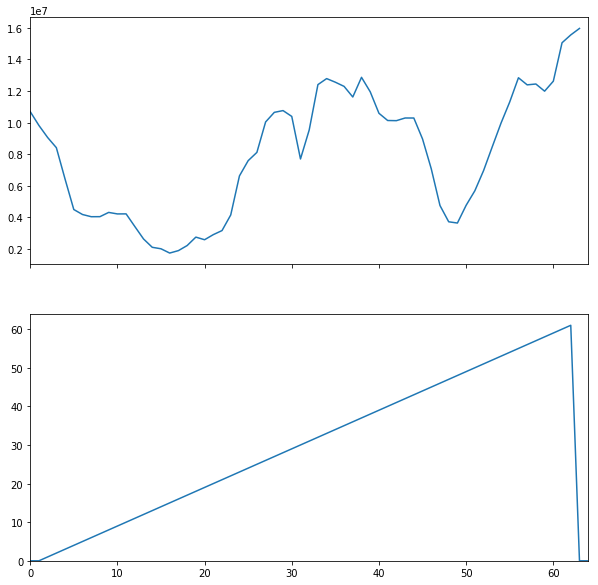

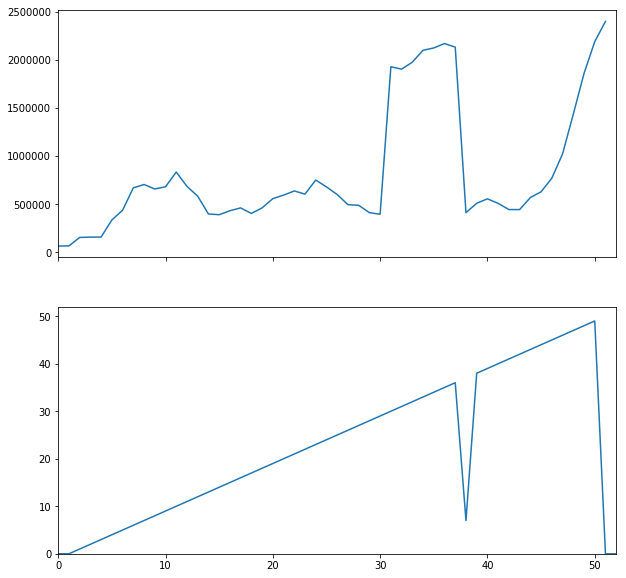

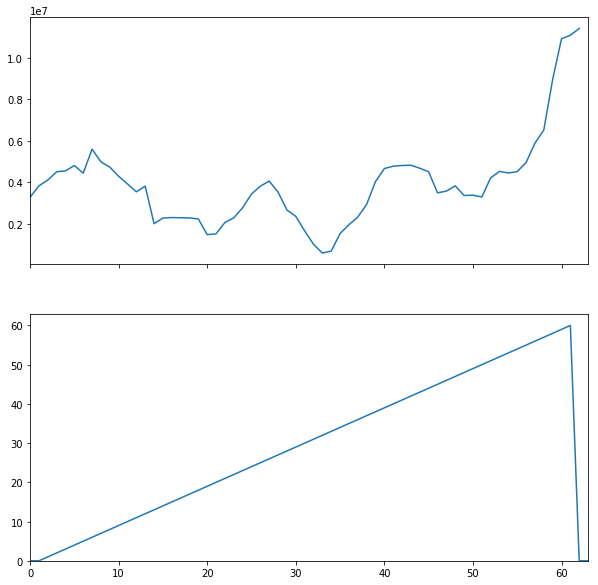

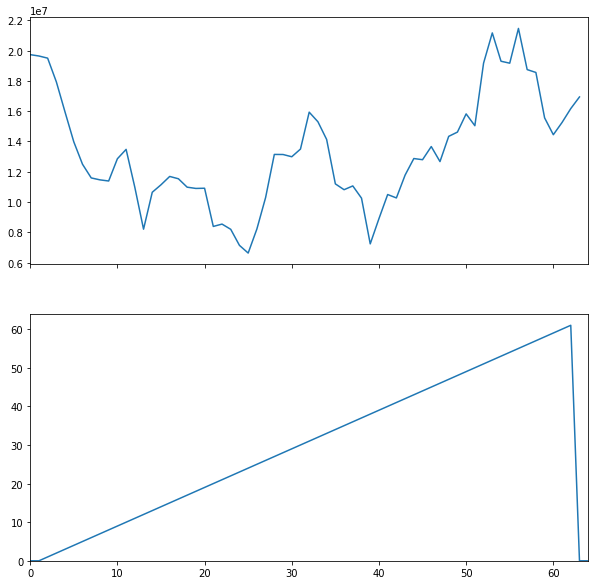

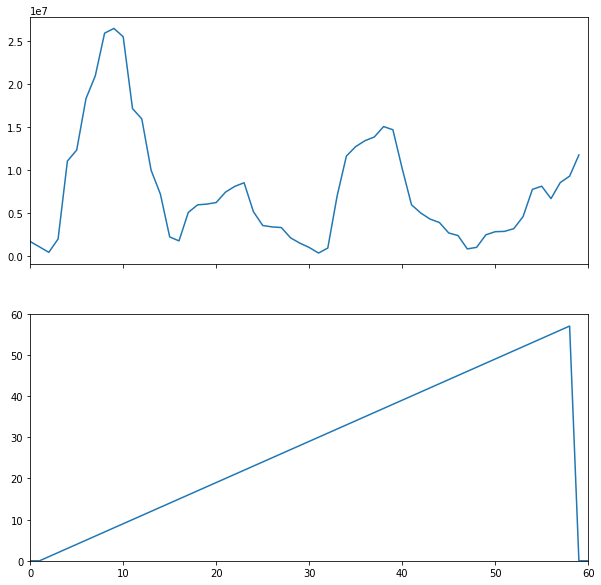

In [66]:
BOCA_analysis(weekly_data1)
BOCA_analysis(weekly_data2)
BOCA_analysis(weekly_data3)
BOCA_analysis(weekly_data4)
BOCA_analysis(weekly_data5)